In [1]:
# Setup environment
import os
import glob
import subprocess
import sys
import time
from scipy.io import netcdf as nc

import matplotlib.pyplot as plt
from os.path import expanduser

# Define output path
home = expanduser("~")
output_dir = os.path.join(home,'scratch')  # main output directory.
os.makedirs(os.path.dirname(output_dir), exist_ok=True)
print(output_dir)

/Users/shawnserbin/scratch


In [6]:
# Grab latest CTSM docker container from Docker hub
source = "serbinsh/ctsm_containers"
docker_container_tag = "ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0"
container_name = ''.join([source,":",docker_container_tag])
print(container_name)
docker_pull_command = ''.join(["docker pull ",source,":",docker_container_tag])
os.system(docker_pull_command)

# you should see docker pull progress in the Jupyter shell

serbinsh/ctsm_containers:ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0


256

In [4]:
# Define run parameters for CTSM
start_year = '1990-01-01'  # you need to place this in the single quotations
num_years = 5
met_start = 1990
met_end = 1996
run_type = "startup"
hostname = "modex"
user = "clmuser"

# Define input/output paths (host:container)
cesm_input_data_paths = "/Volumes/data/Model_Data/cesm_input_datasets:/data"
output_path = ''.join([output_dir,":/ctsm_output"])
print(output_path)

# Define script to run
ctsm_case_build_script = "/ctsm_run_scripts/create_case_ctsmfates_1pt_example_1x1brazil.sh"


/Users/shawnserbin/scratch:/ctsm_output


In [6]:
# Define case build command
run_command = ''.join(["docker run --hostname=",hostname," --user ",user," -v ", cesm_input_data_paths, " -v ", output_path, " ", container_name, " ", ctsm_case_build_script, " ", "-sy=","'",start_year.__str__(),"'", " ", "-ny=",num_years.__str__()," ","-rt=",run_type," ","-mets=",met_start.__str__()," ","-mete=",met_end.__str__()])
print(run_command)


docker run --hostname=modex --user clmuser -v /Volumes/data/Model_Data/cesm_input_datasets:/data -v /Users/sserbin/scratch:/ctsm_output serbinsh/ctsm_containers:ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0 /ctsm_run_scripts/create_case_ctsmfates_1pt_example_1x1brazil.sh -sy='1990-01-01' -ny=5 -rt=startup -mets=1990 -mete=1996


In [7]:
# Build the case
start = time.time()
# run the docker container
os.system(run_command)
# get runtime
end = time.time()
#Print runtime
print(end - start)

163.32820200920105


In [7]:
# Setup case run command
case_directory = "CLM5FATES_1553031038_1x1brazil" # need to grab this from the shell
run_command = ''.join(["docker run --hostname=",hostname," --user ",user," -v ", cesm_input_data_paths, " -v ", output_path, " ",container_name, " ","/bin/sh -c 'cd /ctsm_output/",case_directory," && ./case.submit'"])
print(run_command)


docker run --hostname=modex --user clmuser -v /Volumes/data/Model_Data/cesm_input_datasets:/data -v /Users/shawnserbin/scratch:/ctsm_output serbinsh/ctsm_containers:ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0 /bin/sh -c 'cd /ctsm_output/CLM5FATES_1553031038_1x1brazil && ./case.submit'


In [9]:
# Run the case
start = time.time()
# run the docker container
os.system(run_command)
# get runtime
end = time.time()
#Print runtime
print(end - start)

7561.2029531002045


In [8]:
# explore output

# first concatenate netCDF files
ncfiles = ''.join([case_directory,".clm2.h0.*"])
print(ncfiles)

concat_command = ''.join(["cd ",output_dir,"/",case_directory,"/run"," && ncrcat ",ncfiles," all_years.nc"])
print(concat_command)
os.system(concat_command)

CLM5FATES_1553031038_1x1brazil.clm2.h0.*
cd /Users/shawnserbin/scratch/CLM5FATES_1553031038_1x1brazil/run && ncrcat CLM5FATES_1553031038_1x1brazil.clm2.h0.* all_years.nc


256

In [2]:
# view output header
ncdump = ''.join(["cd ",output_dir,"/",case_directory,"/run"," && ncdump -h all_years.nc"])
print(ncdump)
os.system(ncdump)

NameError: name 'case_directory' is not defined

In [12]:
# get output
filename_in = ''.join([output_dir,"/",case_directory,"/run/all_years.nc"])
print(filename_in)
fin = nc.netcdf_file(filename_in)


/Users/sserbin/scratch/CLM5FATES_1553031038_1x1brazil/run/all_years.nc


In [13]:
## read the coordinate data for the various dimensions
time = fin.variables['time'][:]  ### time dimension, put in unit of years
print(time)

[0.0000000e+00 4.1666668e-02 8.3333336e-02 ... 1.8259166e+03 1.8259584e+03
 1.8260000e+03]


In [14]:
# get variables
gpp = fin.variables['GPP'][:]
print(gpp)
lai = fin.variables['TLAI'][:]
print(lai)

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 ...
 [4.4925928e-05]
 [0.0000000e+00]
 [0.0000000e+00]]
[[0.08340312]
 [0.08299021]
 [0.08257731]
 ...
 [1.1111917 ]
 [1.1111917 ]
 [1.1111917 ]]


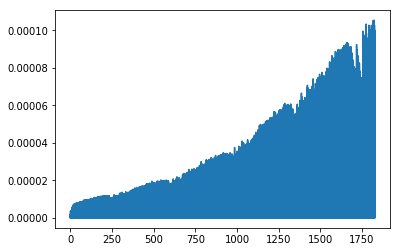

In [15]:
# Plot output
plt.plot(time,gpp, label='GPP')

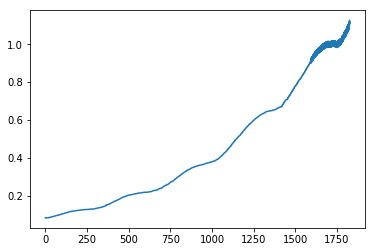

In [16]:
plt.plot(time,lai, label='TLAI')